In [1]:
import Classifier
m=Classifier.Classifier()

Classifier
Cost
Activation
self
Cost
Activation


In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(3)
X=np.random.randn(21, 10000) * 0.01
Y=np.random.randint(2, size=10000)
Y=Y.reshape((1,10000))

In [3]:
train_X,test_X,train_Y,test_Y = X[:,:8000],X[:,8000:],Y[:,:8000],Y[:,8000:]

In [4]:
import pandas as pd
df=pd.read_csv(r"test/Surgical-deepnet.csv")
df

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14630,18.79,14.1,1,0,1,0,0,0,0,0,...,-0.54,1,0,7.78,0,1,0,-0.16,1,1
14631,19.65,12.6,0,0,0,0,0,0,0,0,...,-1.42,4,0,8.40,6,1,0,-0.77,1,1
14632,14.84,12.6,1,0,0,0,0,0,0,0,...,0.65,0,0,13.25,3,3,0,0.99,1,1
14633,17.75,8.9,0,0,1,0,0,0,1,0,...,-0.50,0,1,8.30,5,0,0,0.17,1,1


 The data is distributed as:
                  bmi           Age    asa_status  baseline_cancer  \
count  14635.000000  14635.000000  14635.000000     14635.000000   
mean      31.295642     63.205268      0.632320         0.262316   
std        8.152709     18.088191      0.539952         0.439909   
min        2.150000      6.100000      0.000000         0.000000   
25%       26.510000     51.500000      0.000000         0.000000   
50%       28.980000     59.700000      1.000000         0.000000   
75%       35.295000     74.700000      1.000000         1.000000   
max       92.590000     90.000000      2.000000         1.000000   

       baseline_charlson  baseline_cvd  baseline_dementia  baseline_diabetes  \
count       14635.000000  14635.000000       14635.000000       14635.000000   
mean            0.977520      0.620294           0.004851           0.120875   
std             1.758355      0.485330           0.069485           0.325993   
min             0.000000      0.0000

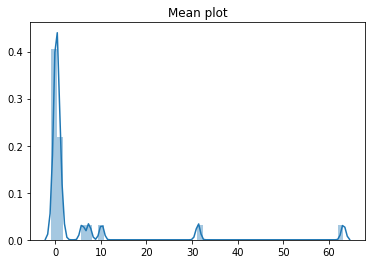

 


The variance of various attributes are:
  bmi                     66.466670
Age                    327.182639
asa_status               0.291548
baseline_cancer          0.193520
baseline_charlson        3.091814
baseline_cvd             0.235545
baseline_dementia        0.004828
baseline_diabetes        0.106271
baseline_digestive       0.153629
baseline_osteoart        0.225285
baseline_psych           0.075620
baseline_pulmonary       0.085242
ahrq_ccs                48.294924
ccsComplicationRate      0.007815
ccsMort30Rate            0.000021
complication_rsi         1.793977
dow                      2.243221
gender                   0.247627
hour                     7.074968
month                   10.496465
moonphase                1.341790
mort30                   0.003948
mortality_rsi            1.425900
race                     0.132979
complication             0.188576
dtype: float64


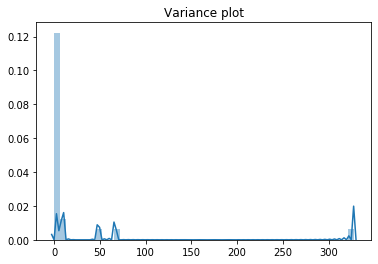

 


The correlation between various attributes:
  


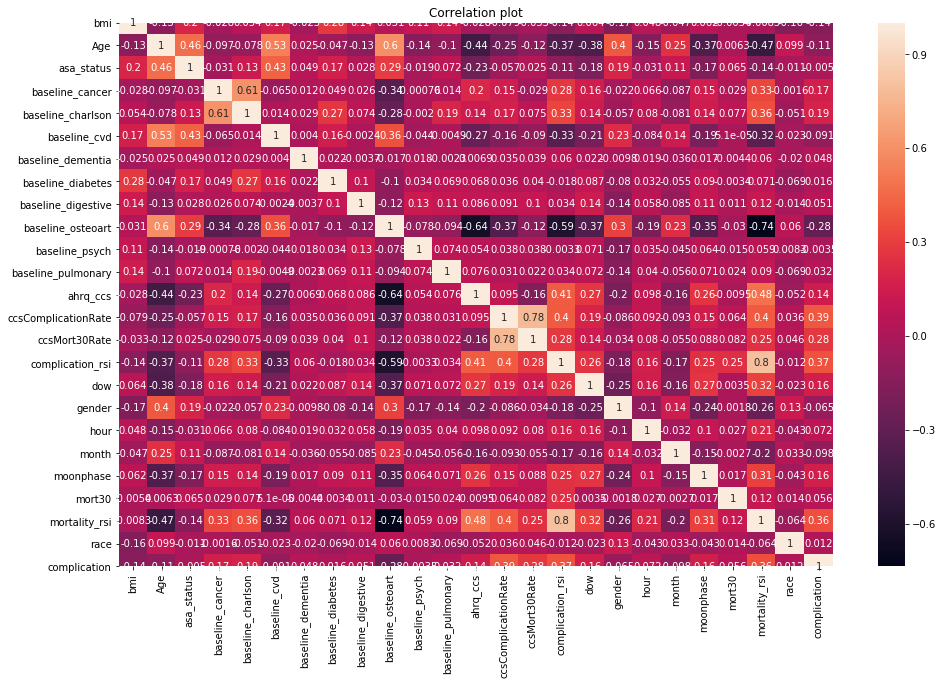

 


The skewness in various attributes of data:
  bmi                     1.566625
Age                     0.043697
asa_status              0.022830
baseline_cancer         1.080752
baseline_charlson       2.753072
baseline_cvd           -0.495787
baseline_dementia      14.253887
baseline_diabetes       2.326293
baseline_digestive      1.584350
baseline_osteoart       0.662738
baseline_psych          3.037574
baseline_pulmonary      2.780939
ahrq_ccs                0.443243
ccsComplicationRate     1.655667
ccsMort30Rate           1.635726
complication_rsi        1.674175
dow                     0.342289
gender                 -0.196520
hour                    0.910604
month                  -0.368161
moonphase               0.379272
mort30                 15.791855
mortality_rsi           0.177513
race                   -0.988003
complication            1.141723
dtype: float64


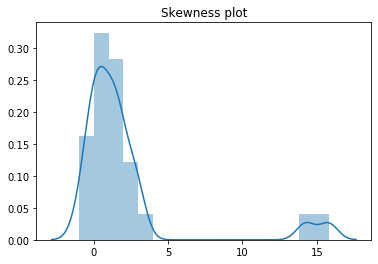

 


The kurtosis in various attributes of data:
  bmi                      4.558745
Age                     -0.964189
asa_status              -0.914238
baseline_cancer         -0.832089
baseline_charlson        8.604893
baseline_cvd            -1.754435
baseline_dementia      201.200779
baseline_diabetes        3.412105
baseline_digestive       0.510235
baseline_osteoart       -1.560992
baseline_psych           7.227842
baseline_pulmonary       5.734408
ahrq_ccs                -1.164465
ccsComplicationRate      3.126975
ccsMort30Rate            1.691929
complication_rsi         7.997901
dow                     -1.360928
gender                  -1.961648
hour                    -0.144361
month                   -0.980531
moonphase               -1.346636
mort30                 247.416496
mortality_rsi           -0.403350
race                     3.720983
complication            -0.696563
dtype: float64


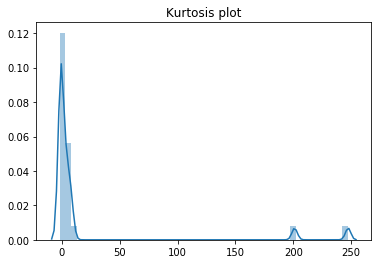

In [5]:
from meta_functions import data_description
data_description(df)

In [6]:
from sklearn.model_selection import train_test_split
c=list(df)
train_X,test_X,train_Y,test_Y = train_test_split( df[c[:-1]], df[c[-1]], test_size=0.33, random_state=42)

In [7]:
train_X=train_X.to_numpy()
test_X=test_X.to_numpy()
train_Y=train_Y.to_numpy()
test_Y=test_Y.to_numpy()
test_Y.shape

(4830,)

In [8]:
train_X=train_X.reshape(24,9805)
train_Y=train_Y.reshape(1,9805)
test_X=test_X.reshape(24,4830)
test_Y=test_Y.reshape(1,4830)

In [9]:
layers_dims = [train_X.shape[0],7,3,1]

Cost after iteration 0: 0.693135
Cost after iteration 100: 0.569066
Cost after iteration 200: 0.567437
Cost after iteration 300: 0.567404


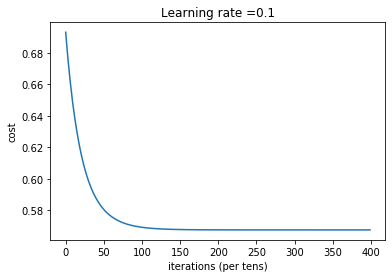

In [10]:
parameters = m.Train(X=train_X, Y=train_Y, layers_dims= layers_dims,print_cost = True,learning_rate=0.1, num_iterations=400)

In [11]:
def predict(X, parameters):

    AL,caches = m.L_model_forward(X, parameters)
    print(AL)
    predictions = AL > 0.5

    return predictions

In [13]:
#Train Accuracy
predictions = predict(train_X, parameters)
print ('Accuracy: %d' % float((np.dot(train_Y,predictions.T) + np.dot(1-train_Y,1-predictions.T))/float(train_Y.size)*100) + '%')

[[0.2547427 0.2547427 0.2547427 ... 0.2547427 0.2547427 0.2547427]]
Accuracy: 74%


In [14]:
# Print accuracy
predictions = predict(test_X, parameters)
print ('Accuracy: %d' % float((np.dot(test_Y,predictions.T) + np.dot(1-test_Y,1-predictions.T))/float(test_Y.size)*100) + '%')

[[0.2547427 0.2547427 0.2547427 ... 0.2547427 0.2547427 0.2547427]]
Accuracy: 75%


C:\Users\DELL\Desktop\Minor 2\rep.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  parameters[i]=parameters[i] - parameters[i].min()/(parameters[i].max()-parameters[i].min())


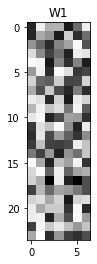

    Percentage Contribution
0                  4.175176
1                  3.767673
2                  4.042594
3                  4.220073
4                  3.947305
5                  4.218087
6                  4.120628
7                  3.752383
8                  4.451109
9                  4.620868
10                 4.099732
11                 4.381602
12                 3.855106
13                 3.986088
14                 3.906447
15                 4.313876
16                 4.540228
17                 3.743953
18                 3.970024
19                 4.586998
20                 4.402652
21                 4.428605
22                 4.603817
23                 3.864977


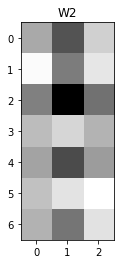

   Percentage Contribution
0                14.255697
1                14.374350
2                14.074999
3                14.355154
4                14.201297
5                14.433226
6                14.305277


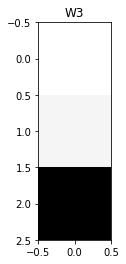

   Percentage Contribution
0                33.405880
1                33.397521
2                33.196599


In [15]:
import rep
rep.represent(parameters)